In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import mysql.connector as cnt

In [4]:
DB = cnt.connect(
    host = "localhost",
    port = 3317,
    database='Baigiamasis',
    user = "root",
    password = "Bmwe39m5"
)

c = DB.cursor()

Duomenys imti iš:
httpswww.kaggle.comdatasetsjustinasnba-players-data - All_seasons

TOP 10 NBA žaidėjų sezonų pasirodymų

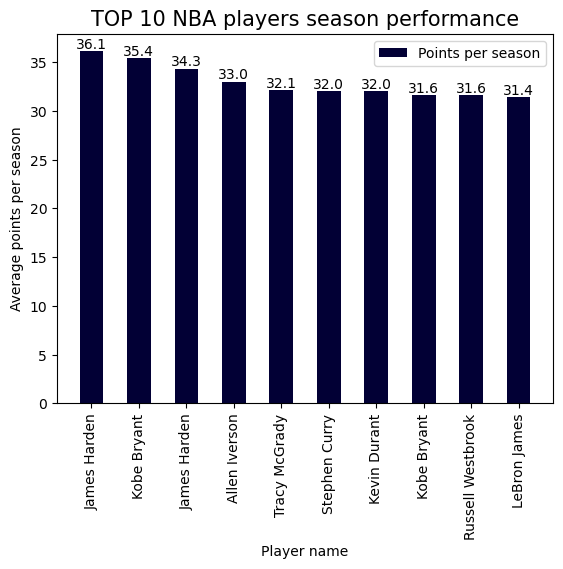

In [13]:
sql = """SELECT player_name, pts, season
from baigiamasis.all_seasons
order by pts DESC
LIMIT 10;"""

c.execute(sql)
ats = c.fetchall()
name = []
pointsII = []

for i in ats:
    name.append(i[0])
    pointsII.append(i[1])

fig, ax = plt.subplots()

x=np.arange(0, len(name))
w = 0.5
A=ax.bar(x, pointsII, width=w, label = 'Points per season', color = 'xkcd:midnight blue' )

ax.bar_label(A, fmt='%.1f')
ax.legend()
ax.set_title('TOP 10 NBA players season performance', fontsize=15)
ax.set_xlabel('Player name')
ax.set_ylabel('Average points per season')
ax.tick_params(axis='x', rotation=90)
ax.set_xticks(x)
ax.set_xticklabels(name)

plt.show()

TOP 10 rezultatyviausi ir nerezultatyviausi Lietuvių sezono pasirodymai.

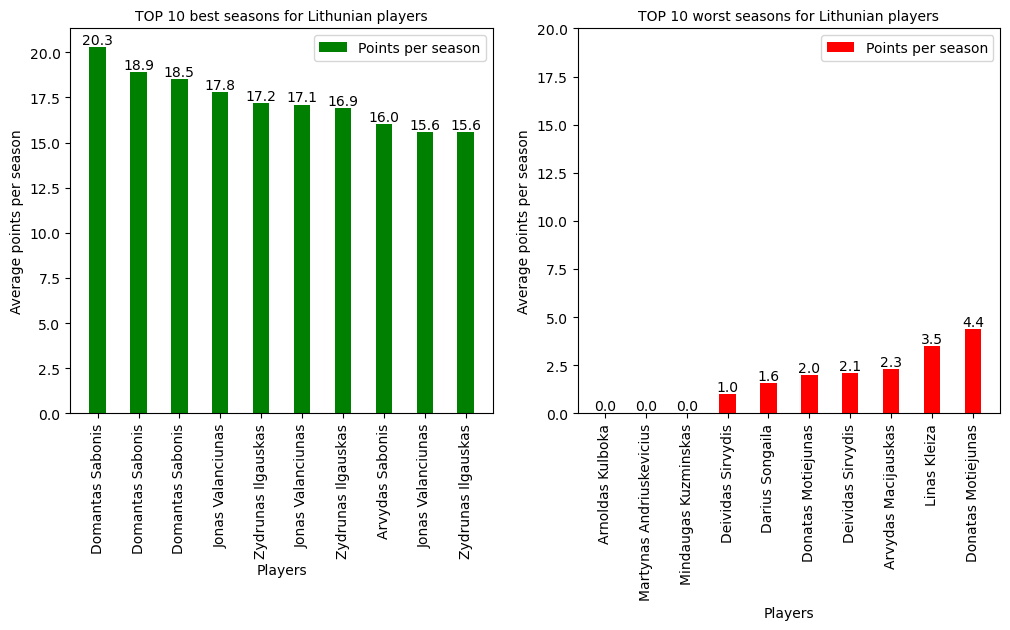

In [24]:
sql = """SELECT player_name, college, country, pts, season
FROM Baigiamasis.all_seasons
WHERE country = 'Lithuania'
ORDER BY pts DESC
LIMIT 10"""

c.execute(sql)
ats = c.fetchall()
players = []
points = []
season = []
for i in ats:
    players.append(i[0])
    points.append(i[3])
    season.append(i[4])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

w=0.4

x=np.arange(0,len(players))

A=ax1.bar(x, points, width = w, label = 'Points per season', color = "green")

ax1.bar_label(A, fmt='%.1f')
ax1.set_title('TOP 10 best seasons for Lithunian players', fontsize=10)
ax1.set_xlabel('Players')
ax1.set_ylabel('Average points per season')
ax1.tick_params(axis='x', rotation=90)
ax1.legend()
ax1.set_xticks(x)
ax1.set_xticklabels(players)

sql = """SELECT player_name, college, country, pts, season
FROM Baigiamasis.all_seasons
WHERE country = 'Lithuania'
ORDER BY pts ASC
LIMIT 10"""

c.execute(sql)
ats = c.fetchall()
players = []
points = []
season = []

for i in ats:
    players.append(i[0])
    points.append(i[3])
    season.append(i[4])

B=ax2.bar (x, points, label = 'Points per season', color = "red", width = w)
ax2.bar_label(B, fmt='%.1f')
ax2.set_title('TOP 10 worst seasons for Lithunian players', fontsize=10)
ax2.set_xlabel('Players')
ax2.set_ylabel('Average points per season')
ax2.tick_params(axis='x', rotation=90)
ax2.set_xticks(x)
ax2.set_xticklabels(players)
ax2.set_ylim(0, 20)
ax2.legend()


NBA pašaukti Lietuviai pirmajame ir antrajame rate

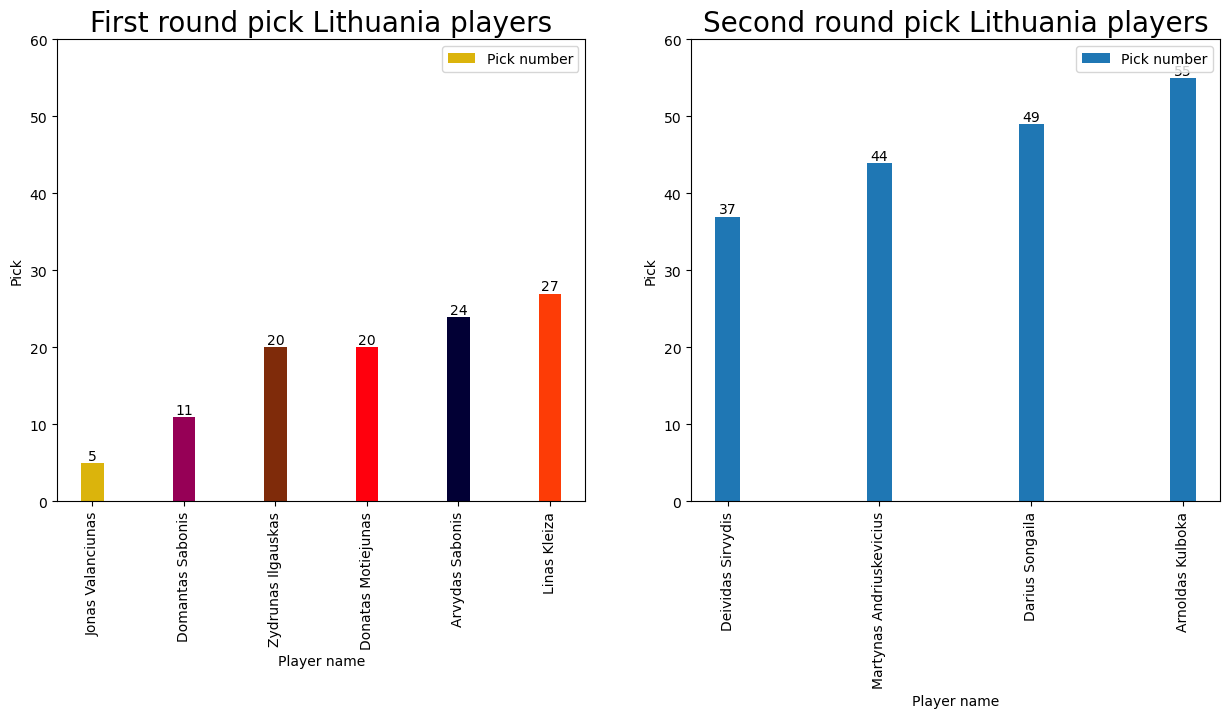

In [27]:
sql = """SELECT player_name, country, draft_year, draft_round, draft_number
FROM Baigiamasis.all_seasons
WHERE country = "Lithuania" AND draft_round = {n}
GROUP BY 1
ORDER BY draft_number ASC;"""

c.execute(sql.format(n= "1"))
ats = c.fetchall()

vardai = []
saukimas = []
for i in ats:
    vardai.append(i[0])
    saukimas.append(i[-1])

c.execute(sql.format(n=2))
ats = c.fetchall()

vardai2 = []
saukimas2 = []
for i in ats:
    vardai2.append(i[0])
    saukimas2.append(i[-1])

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))

colors=['xkcd:gold', 'xkcd:dark magenta', 'xkcd:reddish brown', 'xkcd:bright red', 'xkcd:midnight blue', 'xkcd:red orange']
w= 0.25
A=ax1.bar(vardai, saukimas, color = colors, label = 'Pick number', width=w)
ax1.tick_params(axis='x', rotation=90)
ax1.bar_label(A, fmt='%.0f')
ax1.set_ylim(0, 60)
ax1.set_title('First round pick Lithuania players', fontsize=20)
ax1.set_xlabel('Player name')
ax1.set_ylabel('Pick')
ax1.legend()

B=ax2.bar(vardai2, saukimas2, label = 'Pick number', width=w/1.5)
ax2.tick_params(axis='x', rotation=90)
ax2.bar_label(B, fmt='%.0f')
ax2.set_ylim(0, 60)
ax2.set_title('Second round pick Lithuania players', fontsize=20)
ax2.set_xlabel('Player name')
ax2.set_ylabel('Pick')
ax2.legend()

plt.show()

TOP 5 universitetai daugiausia turėję pirmojo rato šaukimų pirmų šaukimų.

Text(0, 0.5, 'Total first picks of the first round')

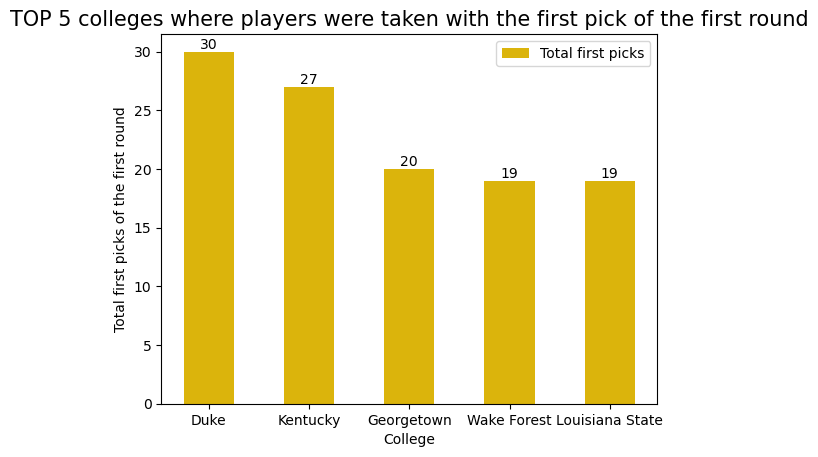

In [16]:
sql = """SELECT draft_round, draft_number, college, count(college)
FROM Baigiamasis.all_seasons
WHERE draft_round = '1' AND draft_number = '1' AND college != 'None'
group by 3
ORDER BY count(college) DESC
LIMIT 5;"""

c.execute(sql)
ats = c.fetchall()
college = []
countI = []

for i in ats:
    college.append(i[2])
    countI.append(i[3])

fig, ax = plt.subplots()
w = 0.5
A=ax.bar(college, countI, width=w, label = 'Total first picks', color = 'xkcd:gold')

ax.bar_label(A, fmt='%.f')
ax.legend()
ax.set_title('TOP 5 colleges where players were taken with the first pick of the first round', fontsize=15)
ax.set_xlabel('College')
ax.set_ylabel('Total first picks of the first round')

Lietuvių žaidėjų karjeros rezultatyvumas žaidžiant NBA.

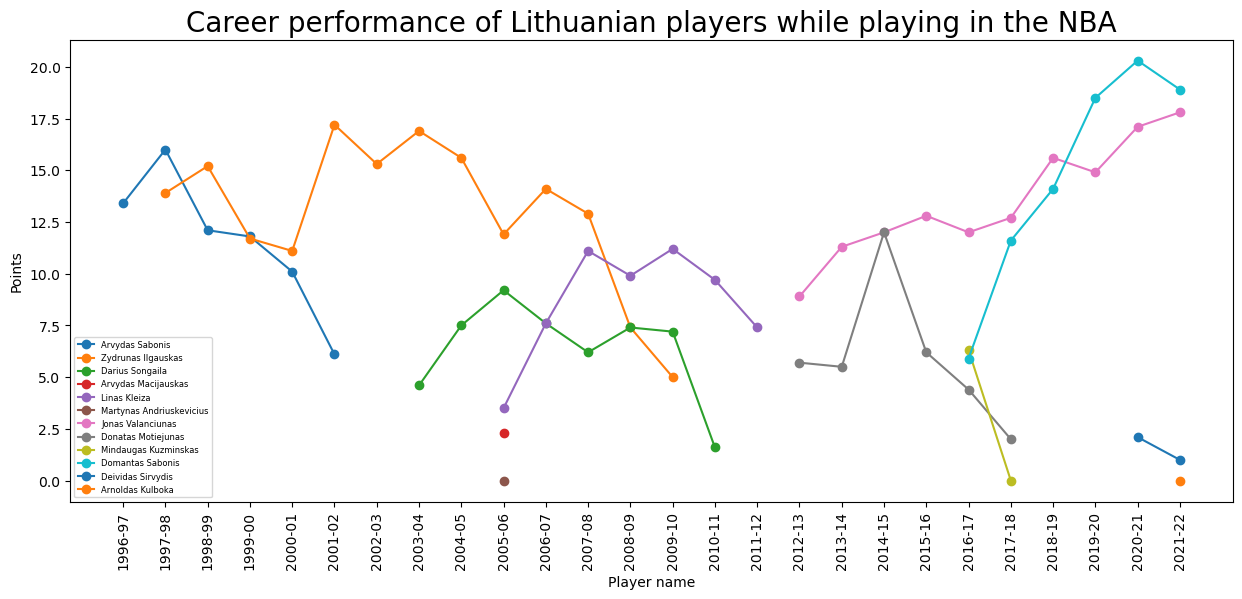

In [28]:
sql = """SELECT player_name, country, pts, season
FROM baigiamasis.all_seasons 
WHERE country = "Lithuania"
ORDER BY season ASC;"""

c.execute(sql)
ats = c.fetchall()

Season = []
for eil in ats:
    if eil[3] not in Season: 
        Season.append(eil[3])

AS = []
ZI = []
DaS = []
AM = []
LK = []
MA = []
JV = []
DM = []
MK = []
DS = []
DeS = []
AK = []

SAS = []
SZI = []
SDaS = []
SAM = []
SLK = []
SMA = []
SJV = []
SDM = []
SMK = []
SDS = []
SDeS = []
SAK = []

for i in ats:
    if i[0] == 'Arvydas Sabonis':
        AS.append(i[2])
    if i[0] == 'Arvydas Sabonis':
        SAS.append(i[3])
    if i[0] == 'Zydrunas Ilgauskas':
        ZI.append(i[2])
    if i[0] == 'Zydrunas Ilgauskas':
        SZI.append(i[3])
    if i[0] == 'Darius Songaila':
        DaS.append(i[2])
    if i[0] == 'Darius Songaila':
        SDaS.append(i[3])
    if i[0] == 'Arvydas Macijauskas':
        AM.append(i[2])
    if i[0] == 'Arvydas Macijauskas':
        SAM.append(i[3])
    if i[0] == 'Linas Kleiza':
        LK.append(i[2])
    if i[0] == 'Linas Kleiza':
        SLK.append(i[3])
    if i[0] == 'Martynas Andriuskevicius':
        MA.append(i[2])
    if i[0] == 'Martynas Andriuskevicius':
        SMA.append(i[3])
    if i[0] == 'Jonas Valanciunas':
        JV.append(i[2])
    if i[0] == 'Jonas Valanciunas':
        SJV.append(i[3])
    if i[0] == 'Donatas Motiejunas':
        DM.append(i[2])
    if i[0] == 'Donatas Motiejunas':
        SDM.append(i[3])
    if i[0] == 'Mindaugas Kuzminskas':
        MK.append(i[2])
    if i[0] == 'Mindaugas Kuzminskas':
        SMK.append(i[3])
    if i[0] == 'Domantas Sabonis':
        DS.append(i[2])
    if i[0] == 'Domantas Sabonis':
        SDS.append(i[3])
    if i[0] == 'Deividas Sirvydis':
        DeS.append(i[2])
    if i[0] == 'Deividas Sirvydis':
        SDeS.append(i[3])
    if i[0] == 'Arnoldas Kulboka':
        AK.append(i[2])
    if i[0] == 'Arnoldas Kulboka':
        SAK.append(i[3])
    
pointAS = AS[0], AS[1], AS[2], AS[3], AS[4], AS[5]
pointZI = ZI[0], ZI[1], ZI[2], ZI[3], ZI[4], ZI[5], ZI[6], ZI[7], ZI[8], ZI[9], ZI[10], ZI[11], ZI[12]
pointDaS = DaS[0], DaS[1], DaS[2], DaS[3], DaS[4], DaS[5], DaS[6], DaS[7]
pointAM = AM[0]
pointLK = LK[0], LK[1], LK[2], LK[3], LK[4], LK[5], LK[6]
pointMA = MA[0]
pointJV = JV[0], JV[1], JV[2], JV[3], JV[4], JV[5], JV[6], JV[7], JV[8], JV[9]
pointDM = DM[0], DM[1], DM[2], DM[3], DM[4], DM[5]
pointMK = MK[0], MK[1]
pointDS = DS[0], DS[1], DS[2], DS[3], DS[4], DS[5]
pointDeS = DeS[0], DeS[1]
pointAK = AK[0]

SeasonAS = SAS[0], SAS[1], SAS[2], SAS[3], SAS[4], SAS[5]
SeasonZI = SZI[0], SZI[1], SZI[2], SZI[3], SZI[4], SZI[5], SZI[6], SZI[7], SZI[8], SZI[9], SZI[10], SZI[11], SZI[12]
SeasonDaS = SDaS[0], SDaS[1], SDaS[2], SDaS[3], SDaS[4], SDaS[5], SDaS[6], SDaS[7]
SeasonAM = SAM[0]
SeasonLK = SLK[0], SLK[1], SLK[2], SLK[3], SLK[4], SLK[5], SLK[6]
SeasonMA = SMA[0]
SeasonJV = SJV[0], SJV[1], SJV[2], SJV[3], SJV[4], SJV[5], SJV[6], SJV[7], SJV[8], SJV[9]
SeasonDM = SDM[0], SDM[1], SDM[2], SDM[3], SDM[4], SDM[5]
SeasonMK = SMK[0], SMK[1]
SeasonDS = SDS[0], SDS[1], SDS[2], SDS[3], SDS[4], SDS[5] 
SeasonDeS = SDeS[0], SDeS[1]
SeasonAK = SAK[0]

fig, ax = plt.subplots(figsize=(15,6))

x=np.arange(0, len(Season))
xAS=np.arange(Season.index(SeasonAS[0]), len(SeasonAS))
xZI=np.arange(Season.index(SeasonZI[0]), len(SeasonZI)+1)
xDaS=np.arange(Season.index(SeasonDaS[0]), len(SeasonDaS)+Season.index(SeasonDaS[0]))
xAM=np.arange(Season.index(SeasonAM), 1+Season.index(SeasonAM)) 
xLK=np.arange(Season.index(SeasonLK[0]), len(SeasonLK)+Season.index(SeasonLK[0]))
xMA=np.arange(Season.index(SeasonMA), 1+Season.index(SeasonMA))
xJV=np.arange(Season.index(SeasonJV[0]), len(SeasonJV)+Season.index(SeasonJV[0]))
xDM=np.arange(Season.index(SeasonDM[0]), len(SeasonDM)+Season.index(SeasonDM[0]))
xMK=np.arange(Season.index(SeasonMK[0]), len(SeasonMK)+Season.index(SeasonMK[0]))
xDS=np.arange(Season.index(SeasonDS[0]), len(SeasonDS)+Season.index(SeasonDS[0]))
xDeS=np.arange(Season.index(SeasonDeS[0]), len(SeasonDeS)+Season.index(SeasonDeS[0]))
xAK=np.arange(Season.index(SeasonAK), 1+Season.index(SeasonAK))

ax.plot(xAS, pointAS, label = 'Arvydas Sabonis', marker = 'o')
ax.plot(xZI, pointZI, label = 'Zydrunas Ilgauskas', marker = 'o')
ax.plot(xDaS, pointDaS, label = 'Darius Songaila', marker = 'o')
ax.plot(xAM, pointAM, label = 'Arvydas Macijauskas', marker = 'o')
ax.plot(xLK, pointLK, label = 'Linas Kleiza', marker = 'o')
ax.plot(xMA, pointMA, label ='Martynas Andriuskevicius', marker = 'o')
ax.plot(xJV, pointJV, label = 'Jonas Valanciunas', marker = 'o')
ax.plot(xDM, pointDM, label = 'Donatas Motiejunas', marker = 'o')
ax.plot(xMK, pointMK, label = 'Mindaugas Kuzminskas', marker = 'o')
ax.plot(xDS, pointDS, label = 'Domantas Sabonis', marker = 'o')
ax.plot(xDeS, pointDeS, label = 'Deividas Sirvydis', marker = 'o')
ax.plot(xAK, pointAK, label = 'Arnoldas Kulboka', marker = 'o')
ax.set_xticks(x)
ax.set_xticklabels(Season)
ax.set_title('Career performance of Lithuanian players while playing in the NBA', fontsize=20)
ax.set_xlabel('Player name')
ax.set_ylabel('Points')
ax.legend(fontsize=6)
ax.tick_params(axis='x', rotation=90)

NBA žaidėjų svorių ir ūgių pasiskirtymas bei vidurkis 

In [30]:
AS = pd.read_csv("all_seasons.csv")
AS1=AS[['player_name','player_height','player_weight']]

In [31]:
playersg= AS1.groupby('player_name')

In [32]:
players=playersg.groups.keys()

In [33]:
players=playersg.groups.keys()
Height = []
Weight = []
for player in players:
    Height.append(playersg.get_group(player)['player_height'].values[0])
    Weight.append(playersg.get_group(player)['player_weight'].values[0])

H = np.mean(Height)
W = np.mean(Weight)

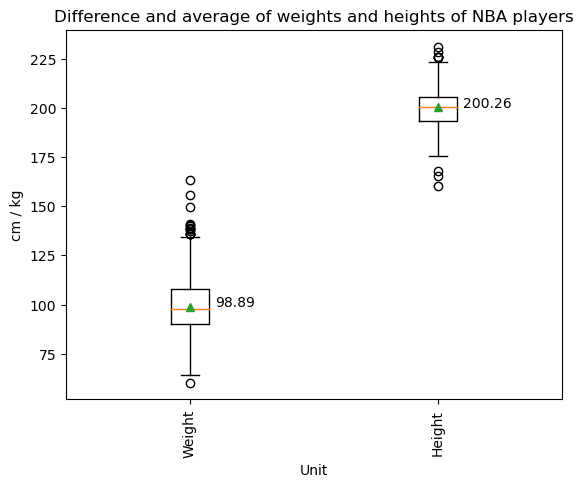

In [34]:
fig, ax = plt.subplots()
ax.boxplot([Weight, Height],showmeans=True)
ax.set_xticklabels(['Weight','Height'], rotation=90)
ax.text(1.1,99, round(W,2))
ax.text(2.1,200, round(H,2))

ax.set_title('Difference and average of weights and heights of NBA players', fontsize=12)
ax.set_xlabel('Unit')
ax.set_ylabel('cm / kg')
plt.show()